1.1添加文件

In [3]:
# 1. 导入 pandas 库
# pandas 是一个强大的数据分析库，我们用它来读取和处理表格数据（比如 .tsv 文件）。
import pandas as pd

# 2. 定义文件路径
# 因为我们的代码在 'scripts/preprocessing' 文件夹中运行，
# 所以需要先用 '../../' 返回到项目的根目录，
# 然后再指定 'data/raw_data/' 文件夹来找到我们的文件。
pg_matrix_path = '../../data/raw_data/report.pg_matrix.tsv'
pr_matrix_path = '../../data/raw_data/report.pr_matrix.tsv'

# 3. 读取 TSV 文件到 pandas DataFrame
# 我们使用 pd.read_csv() 函数来读取文件。
# 因为文件是制表符分隔的 (Tab-Separated Values, TSV)，
# 我们需要明确指定分隔符是 '\t'。
try:
    protein_df = pd.read_csv(pg_matrix_path, sep='\t')
    peptide_df = pd.read_csv(pr_matrix_path, sep='\t')

    # 【新增步骤】将包含唯一ID的列设置为 DataFrame 的索引
    # 这样做的好处是，后续我们可以通过蛋白质或肽段的ID来直接定位某一行，
    # 而不是使用默认的 0, 1, 2... 数字索引，这让数据更具可读性。
    # 'inplace=True' 表示这个修改会直接在原始的 DataFrame上生效。
    protein_df.set_index('Protein.Group', inplace=True)
    peptide_df.set_index('Precursor.Id', inplace=True)
    print("✅ 已成功将 'Protein.Group' 和 'Precursor.Id' 设置为行索引。")


    # 4. 显示蛋白质组 (Protein Group) 矩阵的前5行
    # .head() 是一个非常方便的函数，默认可以查看 DataFrame 的前5行，帮助我们快速了解数据的大致结构。
    # 您会发现，现在最左边一列已经变成了蛋白质组ID，而不是数字。
    print("\n蛋白质组矩阵 (report.pg_matrix.tsv) 的前5行 (索引已设置):")
    display(protein_df.head())

    # 5. 显示肽段 (Precursor) 矩阵的前5行
    print("\n肽段矩阵 (report.pr_matrix.tsv) 的前5行 (索引已设置):")
    display(peptide_df.head())

except FileNotFoundError as e:
    print(f"文件未找到错误: {e}")
    print("\n请确认以下几点：")
    print("1. 您的 Jupyter Notebook 是否确实保存在 'scripts/preprocessing/' 文件夹中？")
    print("2. 'data' 和 'scripts' 文件夹是否在同一个项目根目录下？")
    print("3. 文件名 'report.pg_matrix.tsv' 和 'report.pr_matrix.tsv' 是否正确？")
except KeyError as e:
    # 这是一个新的错误捕获，如果 set_index 找不到指定的列名，就会触发。
    print(f"\n❌ 设置索引时出错: 未能找到指定的列名 {e}。")
    print("请检查 DIANN 输出文件的列名是否与代码中的 'Protein.Group' 或 'Precursor.Id' 完全一致。")

✅ 已成功将 'Protein.Group' 和 'Precursor.Id' 设置为行索引。

蛋白质组矩阵 (report.pg_matrix.tsv) 的前5行 (索引已设置):


,Protein.Names,Genes,First.Protein.Description,N.Sequences,N.Proteotypic.Sequences,D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d,D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d,D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d,D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d
Protein.Group,,,,,,,,,
A0A075B5N3;A0A0G2JE47;Q6KB05,A0A075B5N3_MOUSE;A0A0G2JE47_MOUSE;Q6KB05_MOUSE,Igkv8-28;scFv,NaN,1,0,NaN,9172.38,314348.0,14467.6
A0A075B5P5;A0A1Y7VJN6;A0A4U9FKB1;Q6KAM2,A0A075B5P5_MOUSE;A0A1Y7VJN6_MOUSE;A0A4U9FKB1_M...,Ighg3,NaN,1,1,18983.3,NaN,NaN,22708.1
A0A087WNW3;A0A087WP14;A0A087WP48;A0A087WP85;A0A087WPW5;A0A087WPX0;A0A087WQ25;A0A087WQD0;A0A087WQF8;A0A087WQG4;A0A087WQI3;A0A087WQQ5;A0A087WRS1;A0A087WS04;A0A087WS23;A0A087WS29;F8VQC7,A0A087WNW3_MOUSE;A0A087WP14_MOUSE;A0A087WP48_M...,Ktn1,NaN,9,7,125996.0,143374.00,NaN,169145.0
A0A087WP24;A0A087WPF8;A0A087WRJ2;A0A087WSR2;E9QN99,A0A087WP24_MOUSE;A0A087WPF8_MOUSE;A0A087WRJ2_M...,Abhd14b,NaN,4,4,28182.6,32479.30,52088.3,39553.1
A0A087WPC9,A0A087WPC9_MOUSE,Dnah7b,NaN,1,1,NaN,16579.90,68077.7,17971.0



肽段矩阵 (report.pr_matrix.tsv) 的前5行 (索引已设置):


,Protein.Group,Protein.Ids,Protein.Names,Genes,First.Protein.Description,Proteotypic,Stripped.Sequence,Modified.Sequence,Precursor.Charge,D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d,D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d,D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d,D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d
Precursor.Id,,,,,,,,,,,,,
AAAAAAAAAAAAAAAGAAGK3,P55012,P55012;E9QM38,S12A2_MOUSE,Slc12a2,NaN,1,AAAAAAAAAAAAAAAGAAGK,AAAAAAAAAAAAAAAGAAGK,3,9735.86,NaN,NaN,17339.5
AAAAGALAPGPLPDLAAR2,Q3TW96,Q3TW96;Q8BVK3,UAP1L_MOUSE,Uap1l1,NaN,1,AAAAGALAPGPLPDLAAR,AAAAGALAPGPLPDLAAR,2,62955.70,45491.4,NaN,67201.5
AAAATETSSVFADPVISK2,Q80X85,Q80X85,RT07_MOUSE,Mrps7,NaN,1,AAAATETSSVFADPVISK,AAAATETSSVFADPVISK,2,23096.40,18996.0,NaN,17385.5
AAAAWEER2,E9PX29;Q8VIE5,E9PX29;E9PZC2;Q8VBX2;Q8VIE5;Q91ZE6,E9PX29_MOUSE;Q8VIE5_MOUSE,Sptbn4,NaN,1,AAAAWEER,AAAAWEER,2,NaN,NaN,NaN,15692.2
AAAEDVNVTFEDQQK2,E9Q6U4;Q3UWL8,E9Q6U4;Q3UWL8,E9Q6U4_MOUSE;Q3UWL8_MOUSE,Pfdn4,NaN,1,AAAEDVNVTFEDQQK,AAAEDVNVTFEDQQK,2,46920.40,51620.6,301061.0,47975.8


1.2 数据清洗与过滤

1.2.1不需要进行反库的过滤，Q值过滤，可能需要清除污染物

这个步骤没有完成，一般会有一个污染物的库，这里我只是用了四个简单的蛋白作为污染物，然后进行简单的清除

In [4]:
# ==============================================================================
# (可选步骤) 预处理步骤 1: 移除已知的污染物
# ==============================================================================
#
# 解释:
# 蛋白质组学数据通常会包含在样本处理过程中引入的污染物，例如人源的角蛋白(KRT)、
# 用于酶切的胰蛋白酶(Trypsin)等。这些蛋白质不属于样本内源性蛋白，会干扰后续分析。
#
# 此代码框会根据一个预设的污染物关键词列表，从您的蛋白质矩阵中筛选并移除这些污染物。
#
# --- 如何使用 ---
# -> 如果您想执行去污染操作: 请直接运行此代码框。
# -> 如果您想暂时跳过此步骤: 请不要运行此代码框，直接运行后面的分析代码即可。
#
# 如果您运行后想反悔，只需重新运行最开始加载文件的代码框，即可恢复到原始数据。
# ------------------------------------------------------------------------------

# 1. 定义一个常见的污染物关键词列表
# 您可以根据需要向这个列表中添加或删除关键词。
# 'KRT' 和 'Keratin' 涵盖了大部分角蛋白。
contaminant_keywords = ['KRT', 'Keratin', 'Trypsin', 'trypsin']


# 2. 在执行任何操作前，先显示当前的蛋白质数量
print(f"执行此步骤前，蛋白质组数量为: {len(protein_df)}")
print("-" * 50) # 打印分隔线

# 3. 执行筛选操作
# 我们将创建一个布尔“掩码”(mask)，标记出哪些行是污染物
# 首先，我们确定用于筛选的列名，DIANN的结果中通常是 'Genes' 列
if 'Genes' in protein_df.columns:
    # str.contains() 用于查找包含列表中任何一个关键词的行
    # '|'.join(contaminant_keywords) 会生成一个正则表达式，例如 'KRT|Keratin|Trypsin'
    # na=False 表示如果单元格是空的(NaN)，则不视为污染物
    is_contaminant = protein_df['Genes'].str.contains('|'.join(contaminant_keywords), na=False)
    
    # 4. 使用 ~ (波浪号) 操作符进行反向选择，即保留所有“不是”污染物的行
    # 然后将筛选后的结果重新赋值给 protein_df 变量
    protein_df = protein_df[~is_contaminant]
    
    print("已根据 'Genes' 列成功移除污染物。")

# 也可以添加对'Protein.Ids'列的检查作为备用方案
elif 'Protein.Ids' in protein_df.columns:
    is_contaminant = protein_df['Protein.Ids'].str.contains('|'.join(contaminant_keywords), na=False)
    protein_df = protein_df[~is_contaminant]
    print("已根据 'Protein.Ids' 列成功移除污染物。")
    
else:
    print("警告: 未找到 'Genes' 或 'Protein.Ids' 列，无法执行去污染操作。")


# 5. 显示操作完成后的蛋白质数量和数据预览
print(f"执行此步骤后，剩余蛋白质组数量为: {len(protein_df)}")
print("\n数据预览 (已移除污染物):")
display(protein_df.head())

执行此步骤前，蛋白质组数量为: 4303
--------------------------------------------------
已根据 'Genes' 列成功移除污染物。
执行此步骤后，剩余蛋白质组数量为: 4303

数据预览 (已移除污染物):


,Protein.Names,Genes,First.Protein.Description,N.Sequences,N.Proteotypic.Sequences,D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d,D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d,D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d,D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d
Protein.Group,,,,,,,,,
A0A075B5N3;A0A0G2JE47;Q6KB05,A0A075B5N3_MOUSE;A0A0G2JE47_MOUSE;Q6KB05_MOUSE,Igkv8-28;scFv,NaN,1,0,NaN,9172.38,314348.0,14467.6
A0A075B5P5;A0A1Y7VJN6;A0A4U9FKB1;Q6KAM2,A0A075B5P5_MOUSE;A0A1Y7VJN6_MOUSE;A0A4U9FKB1_M...,Ighg3,NaN,1,1,18983.3,NaN,NaN,22708.1
A0A087WNW3;A0A087WP14;A0A087WP48;A0A087WP85;A0A087WPW5;A0A087WPX0;A0A087WQ25;A0A087WQD0;A0A087WQF8;A0A087WQG4;A0A087WQI3;A0A087WQQ5;A0A087WRS1;A0A087WS04;A0A087WS23;A0A087WS29;F8VQC7,A0A087WNW3_MOUSE;A0A087WP14_MOUSE;A0A087WP48_M...,Ktn1,NaN,9,7,125996.0,143374.00,NaN,169145.0
A0A087WP24;A0A087WPF8;A0A087WRJ2;A0A087WSR2;E9QN99,A0A087WP24_MOUSE;A0A087WPF8_MOUSE;A0A087WRJ2_M...,Abhd14b,NaN,4,4,28182.6,32479.30,52088.3,39553.1
A0A087WPC9,A0A087WPC9_MOUSE,Dnah7b,NaN,1,1,NaN,16579.90,68077.7,17971.0


2.1 肽段与蛋白质数目重复性检测

使用说明：
# 参数配置区：
1. 这里不用进行修改，这就是所有DIANN中都会有的列
2. 这里是进行列名修改的，有多少列修改多少列，前面那个是原列名，冒号后面是修改的列名
3. 不需要动
4. 这里根据自己的需求进行添加，有几个大组就添加几个字典，值代表一个大组内的重复名称，用修改后的名字即可
5. 6. 7.  如果这里设置为None，将进行多个大组之间的比较，因为每个大组内有若干的重复，这里的逻辑是，可以设置，只有在几个重复内出现的时候，才算做这个蛋白或肽段在这一组内出现。
    如果直接改为某一大组，比如“JDL”，那就只会进行组内分析，就是重复性检验


In [5]:
# ==============================================================================
#                                 参数配置区 (修正版)
#                 您只需要修改这个代码框中的内容来控制整个分析流程
# ==============================================================================
import pandas as pd
from IPython.display import display, HTML

# 假设您的 protein_df 和 peptide_df 已经加载好了

# 1. 定义需要排除的元数据列
meta_data_columns = ['Protein.Group', 'Protein.Names', 'Genes', 'First.Protein.Description', 'N.Sequences', 'N.Proteotypic.Sequences' ]

# 2. 【可选】定义列名映射关系 (长名称 -> 短名称)
#    【修正】在字符串前加上 'r' 来创建原始字符串，避免反斜杠被错误解析。
column_mapping = {
    r'D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d': 'JDL_1',
    r'D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d': 'JDL_2',
    r'D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d': 'JDL_3',
    r'D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d': 'JDL_4',
}

# --- 诊断步骤 (可选，但推荐) ---
# 在重命名之前，打印出原始列名，以确保它们与您在上面定义的键完全匹配
print("--- 原始数据中的列名 ---")
print(protein_df.columns.tolist())
print("-" * 50)

# 3. 应用重命名 (如果定义了映射)
if column_mapping:
    protein_df.rename(columns=column_mapping, inplace=True)
    peptide_df.rename(columns=column_mapping, inplace=True)
    print("✅ 列名已根据您的定义更新！")
    print("\n--- 更新后的列名 ---")
    print(protein_df.columns.tolist())
    print("-" * 50)

# 4. 定义您的分组信息 (使用更新后的短名称)
#    您的这部分定义完全正确！
GROUP_DEFINITIONS = {
    'JDL': ['JDL_1', 'JDL_2', 'JDL_3', 'JDL_4'], # 包含3个重复
#   'JDL2' :['JDL_1', 'JDL_2','JDL_3' 'JDL_4'] #包含4个重复
}

# 5. 选择您想分析的模式
#    - 设置为 None:     将进行【多组间】的比较分析。
#    - 设置为 'JDL': 将只分析 'JDL' 组【内部】的重复性。
GROUP_TO_ANALYZE = 'JDL'

# 6. 【用于多组比较】选择要进行韦恩图比较的组 (最多3组)
#    此设置仅在 GROUP_TO_ANALYZE = None 时生效。
VENN_GROUPS_TO_COMPARE = ['JDL', 'JDL2']

# 7. 【用于多组比较】定义韦恩图的逻辑阈值
#    一个蛋白/肽段必须在组内至少N个重复中出现才被计数。
#    此设置仅在 GROUP_TO_ANALYZE = None 时生效。
VENN_REPLICATE_THRESHOLD = 2

--- 原始数据中的列名 ---
['Protein.Names', 'Genes', 'First.Protein.Description', 'N.Sequences', 'N.Proteotypic.Sequences', 'D:\\20250902_SP_pre_experiment_1_data\\JDL_1_RC7_1_32932.d', 'D:\\20250902_SP_pre_experiment_1_data\\JDL_2_RC8_1_32933.d', 'D:\\20250902_SP_pre_experiment_1_data\\JDL_3_RD1_1_32934.d', 'D:\\20250902_SP_pre_experiment_1_data\\JDL_4_RD2_1_32935.d']
--------------------------------------------------
✅ 列名已根据您的定义更新！

--- 更新后的列名 ---
['Protein.Names', 'Genes', 'First.Protein.Description', 'N.Sequences', 'N.Proteotypic.Sequences', 'JDL_1', 'JDL_2', 'JDL_3', 'JDL_4']
--------------------------------------------------


In [6]:
# ==============================================================================
#                      最终版 V3：函数定义区 (修正Seaborn语法)
# ==============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3
from upsetplot import from_contents, UpSet
from IPython.display import display, HTML

# 【核心修正】使用兼容旧版本matplotlib的方式来重置配置参数。
mpl.rcParams.update(mpl.rcParamsDefault)
# 确保坐标轴的负号可以正常显示
plt.rcParams['axes.unicode_minus'] = False

# ... plot_venn_for_replicates 和 plot_upset_for_replicates 函数无需改动，保持原样 ...
def plot_venn_for_replicates(dataframe, data_type, columns_to_analyze):
    """
    Draws a Venn diagram for 2 or 3 replicates for [intra-group] reproducibility check.
    """
    print(f"\n--- Intra-group Replicates Venn Diagram ---")
    sets = []
    for col_name in columns_to_analyze:
        identified_ids = dataframe[col_name].dropna().index.tolist()
        sets.append(set(identified_ids))
    plt.figure(figsize=(8, 8))
    if len(columns_to_analyze) == 2:
        venn2(subsets=sets, set_labels=columns_to_analyze)
    elif len(columns_to_analyze) == 3:
        venn3(subsets=sets, set_labels=columns_to_analyze)
    plt.title(f'Identification Overlap within {data_type.split(" ")[0]} Replicates', fontsize=16)
    plt.show()

def plot_upset_for_replicates(dataframe, data_type, columns_to_analyze):
    """
    Draws an Upset Plot for more than 3 replicates for [intra-group] reproducibility check.
    """
    print(f"\n--- Intra-group Replicates Upset Plot ---")
    contents_for_upset = {col: dataframe[col].dropna().index.tolist() for col in columns_to_analyze}
    upset_data = from_contents(contents_for_upset)
    plt.figure(figsize=(12, 6))
    upset_plot = UpSet(upset_data, subset_size='count', sort_by='cardinality', show_counts=True)
    upset_plot.plot()
    plt.suptitle(f'Identification Overlap within {data_type.split(" ")[0]} Replicates', fontsize=16)
    plt.show()


def analyze_base_stats_and_inter_group_venn(dataframe, data_type, columns_to_analyze, 
                                            all_group_definitions=None, venn_group_names=None, 
                                            venn_threshold=1):
    """
    Performs basic stats (count table and bar plot) and draws a Venn diagram for [inter-group] comparison.
    """
    display(HTML(f"<h2>{data_type} Reproducibility Analysis</h2>"))
    print(f"Analyzing samples: {', '.join(columns_to_analyze)}\n")

    # 1. 统计每个样本的非NaN计数
    counts = dataframe.loc[:, columns_to_analyze].notna().sum()
    counts_df = counts.to_frame(name='Number of Identifications')
    print("--- 1. Table of Identification Counts per Sample ---")
    display(counts_df)
    
    # 2. 绘制柱状图
    print("\n--- 2. Bar Plot of Identification Counts per Sample ---")
    plt.figure(figsize=(max(8, len(columns_to_analyze)*0.8), 6))
    
    # 【核心修正】更新seaborn的调用语法以消除FutureWarning。
    # 根据警告的建议，将x变量也赋给hue，并关闭图例。
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis', legend=False)
    
    for index, value in enumerate(counts):
        plt.text(index, value + (counts.max() * 0.01), str(value), ha='center', va='bottom')
    plt.ylabel(f'Number of {data_type.split(" ")[0]} Identifications', fontsize=12)
    plt.xlabel('Sample Name', fontsize=12)
    plt.title(f'Number of {data_type} Identifications', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 3. 为【多组间比较】绘制韦恩图
    if venn_group_names and len(venn_group_names) in [2, 3]:
        print(f"\n--- 3. Inter-group Venn Diagram (Logic: Present in at least {venn_threshold} replicates) ---")
        sets = []
        for group_name in venn_group_names:
            group_columns = all_group_definitions[group_name]
            identified_ids = dataframe.dropna(subset=group_columns, thresh=venn_threshold).index.tolist()
            sets.append(set(identified_ids))
            
        plt.figure(figsize=(8, 8))
        if len(venn_group_names) == 2:
            venn2(subsets=sets, set_labels=venn_group_names)
        else:
            venn3(subsets=sets, set_labels=venn_group_names)
        plt.title(f'Shared and Unique {data_type.split(" ")[0]} Counts Between Groups', fontsize=16)
        plt.show()

✅ Mode: [Intra-group Analysis] | Analyzing group: 'JDL' | Replicates: 4
--------------------------------------------------


Analyzing samples: JDL_1, JDL_2, JDL_3, JDL_4

--- 1. Table of Identification Counts per Sample ---


,Number of Identifications
JDL_1,4194
JDL_2,4144
JDL_3,2059
JDL_4,4116



--- 2. Bar Plot of Identification Counts per Sample ---


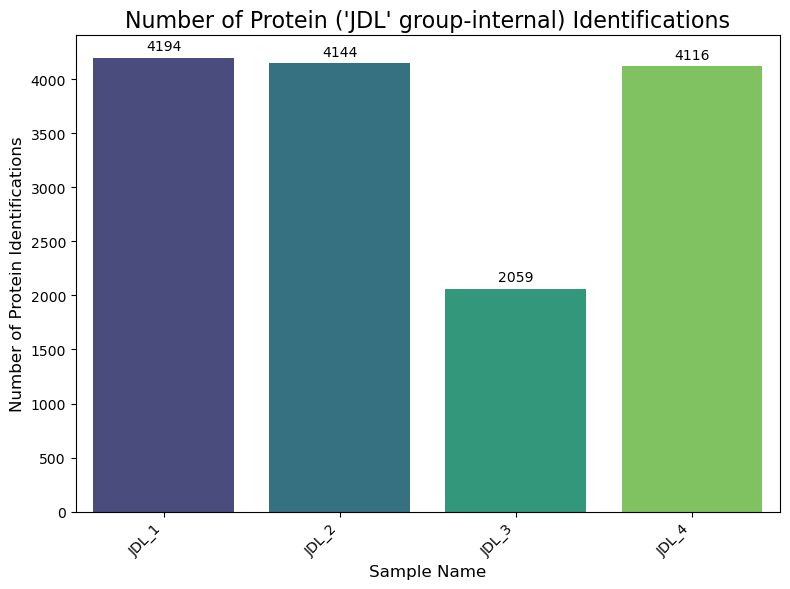


--- Intra-group Replicates Upset Plot ---


/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sty

<Figure size 1200x600 with 0 Axes>

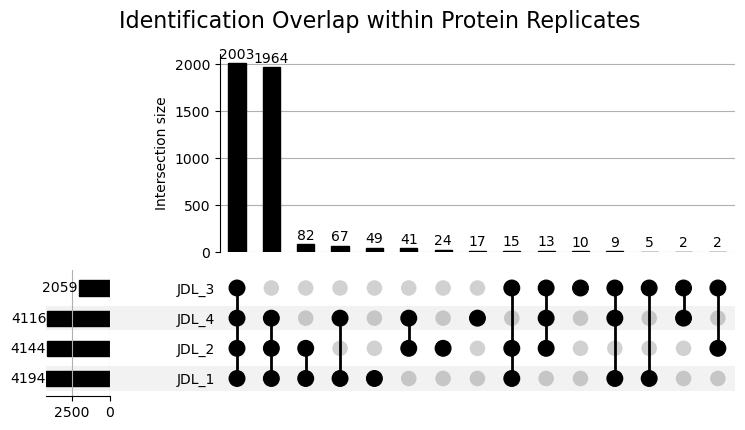

Analyzing samples: JDL_1, JDL_2, JDL_3, JDL_4

--- 1. Table of Identification Counts per Sample ---


,Number of Identifications
JDL_1,22476
JDL_2,21898
JDL_3,6384
JDL_4,21352



--- 2. Bar Plot of Identification Counts per Sample ---


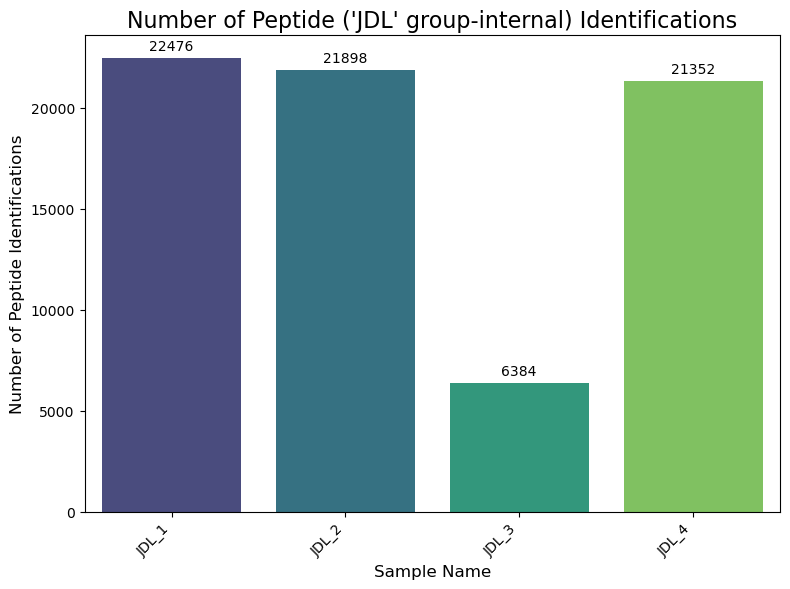


--- Intra-group Replicates Upset Plot ---


/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sty

<Figure size 1200x600 with 0 Axes>

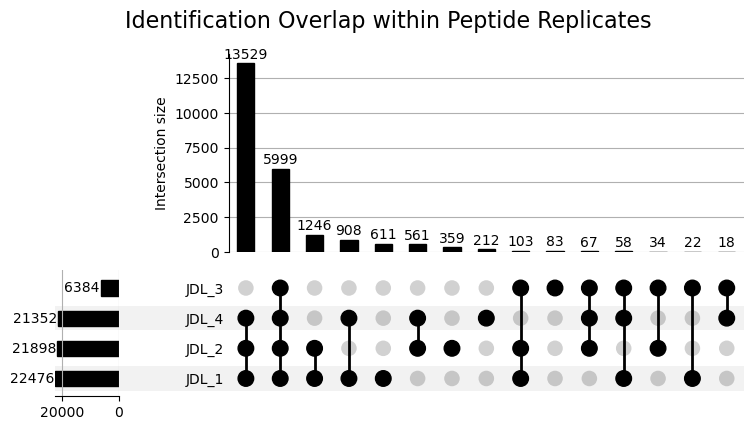

In [7]:
# ==============================================================================
#                      最终版 V3：主逻辑执行区 (修正调用参数)
# ==============================================================================

# ... (此区域的前半部分，即模式判断逻辑，保持不变) ...
is_single_group_analysis = False
columns_for_analysis = []
analysis_title_suffix = ""
if GROUP_TO_ANALYZE and GROUP_TO_ANALYZE in GROUP_DEFINITIONS:
    is_single_group_analysis = True
    columns_for_analysis = GROUP_DEFINITIONS[GROUP_TO_ANALYZE]
    analysis_title_suffix = f"'{GROUP_TO_ANALYZE}' group-internal"
    print(f"✅ Mode: [Intra-group Analysis] | Analyzing group: '{GROUP_TO_ANALYZE}' | Replicates: {len(columns_for_analysis)}")
else:
    is_single_group_analysis = False
    all_sample_columns = [col for df in [protein_df, peptide_df] for col in df.columns if col not in meta_data_columns]
    columns_for_analysis = sorted(list(set(all_sample_columns)))
    analysis_title_suffix = "All Samples"
    print(f"✅ Mode: [Inter-group Comparison] | Analyzing all defined samples")

def run_analysis_pipeline(dataframe, data_type):
    analyze_base_stats_and_inter_group_venn(
        dataframe=dataframe, 
        data_type=data_type, 
        columns_to_analyze=columns_for_analysis,
        all_group_definitions=GROUP_DEFINITIONS,
        venn_group_names=VENN_GROUPS_TO_COMPARE if not is_single_group_analysis else [],
        venn_threshold=VENN_REPLICATE_THRESHOLD
    )
    if is_single_group_analysis:
        num_replicates = len(columns_for_analysis)
        if num_replicates <= 1:
            print("\n--- Intra-group overlap analysis skipped (only one replicate) ---")
        elif num_replicates <= 3:
            plot_venn_for_replicates(dataframe, data_type, columns_for_analysis)
        else:
            plot_upset_for_replicates(dataframe, data_type, columns_for_analysis)

# --- 3. 执行分析 ---
if columns_for_analysis:
    print("-" * 50)
    
    # 【核心修正】将传入的 "蛋白质" 和 "肽段" 改为英文 "Protein" 和 "Peptide"
    # 分析蛋白质数据
    run_analysis_pipeline(protein_df, f"Protein ({analysis_title_suffix})")
    
    print("\n" + "=" * 80 + "\n") # 打印分隔符
    
    # 分析肽段数据
    run_analysis_pipeline(peptide_df, f"Peptide ({analysis_title_suffix})")
    
else:
    print("❌ Error: No sample columns found for analysis. Please check your 'GROUP_TO_ANALYZE' setting.")

2.2 蛋白质定量重复性分析

In [8]:
# ==============================================================================
#                      定量重复性分析 - 函数定义区
#           包含了相关性热图、PCA图和箱线图的绘图功能，无需修改
# ==============================================================================
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def analyze_quantitative_reproducibility(dataframe, columns_to_analyze, group_mapping):
    """
    对蛋白质定量数据进行重复性分析，并生成核心QC图表。

    参数:
    ----------
    dataframe : pd.DataFrame
        输入的蛋白质定量矩阵 (protein_df)。
        
    columns_to_analyze : list
        一个包含要分析的样本列名的列表。
        
    group_mapping : dict
        一个将每个样本名映射到其组名的字典，用于PCA图的着色。
        例如: {'JDL_1': 'JDL', 'JDL_2': 'JDL', ...}
    """
    display(HTML(f"<h2>Quantitative Reproducibility Analysis</h2>"))
    print(f"Analyzing samples: {', '.join(columns_to_analyze)}\n")
    
    # --- 1. 数据预处理：Log2转换 ---
    # a. 选择定量列
    quant_df = dataframe[columns_to_analyze].copy()
    
    # b. 进行Log2转换。+1是为了避免log2(0)的计算错误。
    # 这是蛋白质组学中进行统计分析前的标准步骤。
    quant_df_log2 = np.log2(quant_df + 1)
    
    # --- 2. 绘制相关性热图 (Correlation Heatmap) ---
    print("\n--- 1. Pearson Correlation Heatmap ---")
    # a. 计算皮尔逊相关系数矩阵
    #    我们在这里移除了含有任何NaN的行，以确保相关性计算的准确性。
    corr_matrix = quant_df_log2.dropna().corr(method='pearson')
    
    # b. 绘图
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
    plt.title('Sample Correlation Heatmap (Log2 Intensity)', fontsize=16)
    plt.show()
    
    # --- 3. 绘制主成分分析图 (PCA Plot) ---
    print("\n--- 2. Principal Component Analysis (PCA) Plot ---")
    # a. 准备PCA数据。PCA不能处理缺失值，因此我们移除含有任何NaN的蛋白质行。
    pca_data = quant_df_log2.dropna()
    
    if pca_data.shape[0] < 2:
        print("Warning: Not enough data for PCA after removing missing values. Skipping PCA plot.")
    else:
        # b. PCA需要将样本作为行，特征作为列，因此我们对数据进行转置 (.T)
        #    同时进行标准化 (StandardScaler)，这是PCA的标准步骤。
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(pca_data.T)
        
        # c. 执行PCA
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(scaled_data)
        
        # d. 创建用于绘图的DataFrame
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Sample'] = columns_to_analyze
        pca_df['Group'] = pca_df['Sample'].map(group_mapping)
        
        # e. 绘图
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            x='PC1', 
            y='PC2', 
            hue='Group', 
            data=pca_df, 
            s=150,          # 点的大小
            alpha=0.8       # 透明度
        )
        
        # f. 添加标签和标题
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
        plt.title('PCA of Samples (Log2 Intensity)', fontsize=16)
        plt.grid(True)
        plt.show()
        
    # --- 4. 绘制箱线图 (Box Plot) ---
    print("\n--- 3. Box Plot of Intensity Distribution ---")
    plt.figure(figsize=(max(8, len(columns_to_analyze)*0.8), 6))
    sns.boxplot(data=quant_df_log2)
    plt.title('Distribution of Log2 Protein Intensities per Sample', fontsize=16)
    plt.ylabel('Log2 Intensity', fontsize=12)
    plt.xlabel('Sample Name', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


✅ Mode: Analyzing quantitative reproducibility within group 'JDL'.

--- Quantitative Matrix for Analysis (first 5 rows) ---


,JDL_1,JDL_2,JDL_3,JDL_4
Protein.Group,,,,
A0A075B5N3;A0A0G2JE47;Q6KB05,NaN,13.163238,18.262008,13.820638
A0A075B5P5;A0A1Y7VJN6;A0A4U9FKB1;Q6KAM2,14.212519,NaN,NaN,14.470983
A0A087WNW3;A0A087WP14;A0A087WP48;A0A087WP85;A0A087WPW5;A0A087WPX0;A0A087WQ25;A0A087WQD0;A0A087WQF8;A0A087WQG4;A0A087WQI3;A0A087WQQ5;A0A087WRS1;A0A087WS04;A0A087WS23;A0A087WS29;F8VQC7,16.943030,17.129434,NaN,17.367910
A0A087WP24;A0A087WPF8;A0A087WRJ2;A0A087WSR2;E9QN99,14.782568,14.987277,15.668699,15.271540
A0A087WPC9,NaN,14.017235,16.054916,14.133463


Analyzing samples: JDL_1, JDL_2, JDL_3, JDL_4


--- 1. Pearson Correlation Heatmap ---


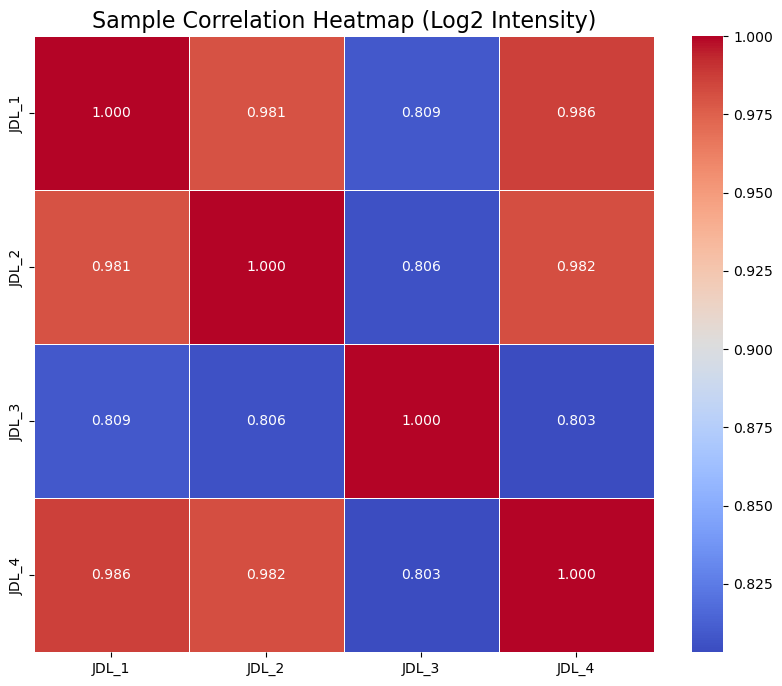


--- 2. Principal Component Analysis (PCA) Plot ---


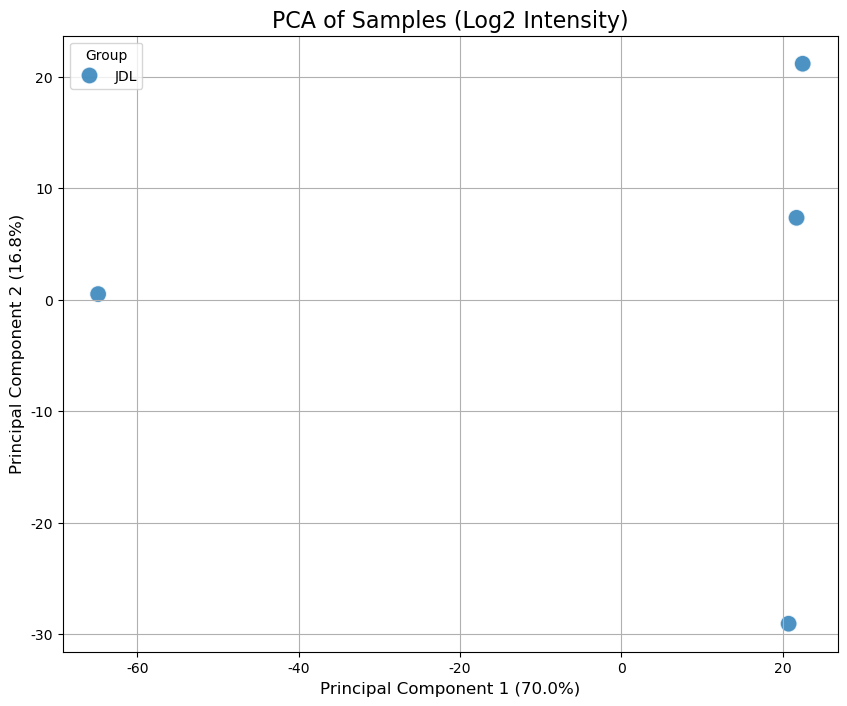


--- 3. Box Plot of Intensity Distribution ---


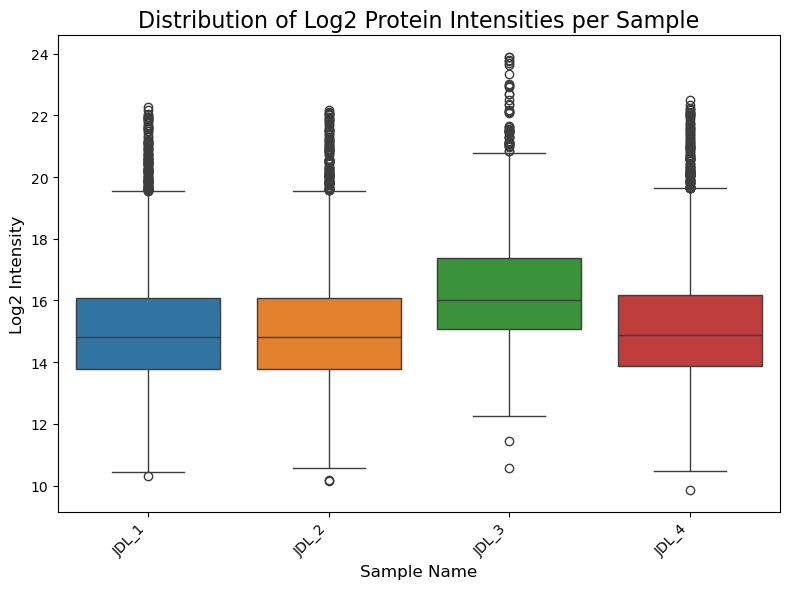

In [9]:
# ==============================================================================
#                      定量重复性分析 - 主逻辑执行区 (更新版)
#             该代码框会根据您的【初始配置】自动执行定量QC分析
# ==============================================================================

# --- 1. 决定要分析的样本列 ---
columns_for_qc = []
if GROUP_TO_ANALYZE and GROUP_TO_ANALYZE in GROUP_DEFINITIONS:
    columns_for_qc = GROUP_DEFINITIONS[GROUP_TO_ANALYZE]
    print(f"✅ Mode: Analyzing quantitative reproducibility within group '{GROUP_TO_ANALYZE}'.")
else:
    all_defined_samples = [sample for group_samples in GROUP_DEFINITIONS.values() for sample in group_samples]
    columns_for_qc = sorted(list(set(all_defined_samples)))
    print(f"✅ Mode: Analyzing quantitative reproducibility across all defined samples.")

# --- 2. 准备PCA图所需的分组信息 ---
group_mapping = {
    sample: group_name 
    for group_name, samples in GROUP_DEFINITIONS.items() 
    for sample in samples
}

# --- 3. 【新增代码】准备并展示用于分析的定量矩阵 ---
if columns_for_qc:
    # a. 从protein_df中选取相关的样本列
    quant_df_subset = protein_df[columns_for_qc]
    
    # b. 进行Log2转换，得到最终用于分析的矩阵
    quant_df_log2_for_display = np.log2(quant_df_subset + 1)
    
    # c. 打印出Log2转换后的定量矩阵的前5行，让您直观感受
    print("\n--- Quantitative Matrix for Analysis (first 5 rows) ---")
    display(quant_df_log2_for_display.head())
    
# --- 4. 执行核心分析 ---
if columns_for_qc:
    # 调用函数，对蛋白质数据进行分析
    analyze_quantitative_reproducibility(
        dataframe=protein_df, 
        columns_to_analyze=columns_for_qc, 
        group_mapping=group_mapping
    )
else:
    print("❌ Error: No sample columns found for analysis. Please check your configuration.")

2.4 质控整合（蛋白质组和肽段鉴定数，每个蛋白质组鉴定数，酶漏切数）

In [10]:
# ==============================================================================
#                      全新分析：第一步 - 数据加载与探索
#        本代码框的目标是读取DIANN的主报告文件，并了解其基本结构。
# ==============================================================================

# --- 1. 导入必备的库 ---

# a. 导入 pandas 库，这是我们在 Python 中处理所有表格数据的核心工具。
#    我们通常给它起一个别名 'pd'，这是一个约定俗成的习惯。
import pandas as pd
# b. 导入 display 和 HTML，这是为了能让输出的标题更好看，属于可选的美化步骤。
from IPython.display import display, HTML
# c. 为了能读取 .parquet 文件，pandas 需要一个叫做 'pyarrow' 的“引擎”。
#    下面的代码会确保这个引擎已经被安装。
try:
    import pyarrow
except ImportError:
    print("正在安装 'pyarrow' 库，这是读取 .parquet 文件所必需的...")
    # 使用 ! 来在 Jupyter Notebook 中直接运行命令行指令
    !pip install pyarrow
    print("✅ 'pyarrow' 安装完成！")


# --- 2. 定义文件的路径 ---

# a. 请在这里填入您的 report.parquet 文件相对于当前 Notebook 的路径。
#    '../../' 的意思是“返回到上两级目录”。
#    在路径字符串前加上 'r' 是一个非常好的习惯，它可以防止路径中的反斜杠 '\' 被错误地解析。
report_file_path = r'../../data/raw_data/report.parquet'


# --- 3. 读取文件并进行探索 ---

# 我们使用 try...except 结构来“捕获”可能发生的错误，比如文件找不到。
# 这样代码会给出友好的提示，而不是直接崩溃。
try:
    # a. 打印一条信息，告诉我们程序正在做什么
    display(HTML("<h2>Step 1: Loading and Exploring the DIANN Main Report File</h2>"))
    print(f"正在读取文件: {report_file_path} ...")
    
    # b. 【核心代码】使用 pandas 的 pd.read_parquet() 函数来读取文件。
    #    读取成功后，所有的数据都会被存放到一个叫做 'report_df' 的 DataFrame 变量中。
    report_df = pd.read_parquet(report_file_path)
    print("✅ 文件读取成功！")

    # c. 【探索步骤 1】查看文件的基本信息
    print("\n\n--- (A) 文件基本信息 ---")
    # .info() 是一个非常有用的命令，它会为我们列出：
    #   - 总共有多少行 (entries) 和多少列 (columns)。
    #   - 每一列的名称 (Column)。
    #   - 每一列有多少个非空值 (Non-Null Count)。
    #   - 每一列存储的数据是什么类型 (Dtype)，比如数字、文本等。
    report_df.info()

    # d. 【探索步骤 2】查看文件的前几行内容
    print("\n\n--- (B) 文件内容预览 (前 5 行) ---")
    # .head() 可以让我们直观地看到真实的数据长什么样，这对于理解数据结构至关重要。
    display(report_df.head())
    
    # e. 【探索步骤 3】获取一个完整的列名列表
    print("\n\n--- (C) 完整的列名列表 ---")
    # 有时候我们只想快速得到一个所有列名的列表，方便后续在写代码时复制粘贴，确保不会有拼写错误。
    print(report_df.columns.tolist())

except FileNotFoundError:
    # 如果上面的 try 代码块中发生了“文件未找到”的错误，就会执行这里的代码。
    print(f"❌ 错误: 文件未找到！请仔细检查您提供的路径是否正确: {report_file_path}")
except Exception as e:
    # 如果发生了其他任何意想不到的错误，也打印出来。
    print(f"❌ 发生了一个意想不到的错误: {e}")

正在读取文件: ../../data/raw_data/report.parquet ...
✅ 文件读取成功！


--- (A) 文件基本信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73011 entries, 0 to 73010
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Run.Index                     73011 non-null  int64  
 1   Run                           73011 non-null  object 
 2   Channel                       73011 non-null  object 
 3   Precursor.Id                  73011 non-null  object 
 4   Modified.Sequence             73011 non-null  object 
 5   Stripped.Sequence             73011 non-null  object 
 6   Precursor.Charge              73011 non-null  int64  
 7   Precursor.Lib.Index           73011 non-null  int64  
 8   Decoy                         73011 non-null  int64  
 9   Proteotypic                   73011 non-null  int64  
 10  Precursor.Mz                  73011 non-null  float32
 11  Protein.Ids                   73011 non-n

,Run.Index,Run,Channel,Precursor.Id,Modified.Sequence,Stripped.Sequence,Precursor.Charge,Precursor.Lib.Index,Decoy,Proteotypic,...,Translated.Q.Value,Channel.Q.Value,PG.Q.Value,PG.PEP,GG.Q.Value,Protein.Q.Value,Global.PG.Q.Value,Lib.PG.Q.Value,Best.Fr.Mz,Best.Fr.Mz.Delta
0,0,JDL_1_RC7_1_32932,,AAAAAAAAAAAAAAAGAAGK3,AAAAAAAAAAAAAAAGAAGK,AAAAAAAAAAAAAAAGAAGK,3,0,0,1,...,0.0,0.0,0.000306,0.000600,0.000308,0.0,0.000289,0.000259,616.341309,-0.003845
1,3,JDL_4_RD2_1_32935,,AAAAAAAAAAAAAAAGAAGK3,AAAAAAAAAAAAAAAGAAGK,AAAAAAAAAAAAAAAGAAGK,3,0,0,1,...,0.0,0.0,0.000310,0.000611,0.000313,0.0,0.000289,0.000259,616.341309,-0.005615
2,0,JDL_1_RC7_1_32932,,AAAAGALAPGPLPDLAAR2,AAAAGALAPGPLPDLAAR,AAAAGALAPGPLPDLAAR,2,1,0,1,...,0.0,0.0,0.000306,0.000600,0.000308,0.0,0.000289,0.000259,1006.567993,0.003845
3,1,JDL_2_RC8_1_32933,,AAAAGALAPGPLPDLAAR2,AAAAGALAPGPLPDLAAR,AAAAGALAPGPLPDLAAR,2,1,0,1,...,0.0,0.0,0.000305,0.000868,0.000307,0.0,0.000289,0.000259,526.298401,-0.002441
4,3,JDL_4_RD2_1_32935,,AAAAGALAPGPLPDLAAR2,AAAAGALAPGPLPDLAAR,AAAAGALAPGPLPDLAAR,2,1,0,1,...,0.0,0.0,0.000310,0.000611,0.000313,0.0,0.000289,0.000259,413.214325,-0.003815




--- (C) 完整的列名列表 ---
['Run.Index', 'Run', 'Channel', 'Precursor.Id', 'Modified.Sequence', 'Stripped.Sequence', 'Precursor.Charge', 'Precursor.Lib.Index', 'Decoy', 'Proteotypic', 'Precursor.Mz', 'Protein.Ids', 'Protein.Group', 'Protein.Names', 'Genes', 'RT', 'iRT', 'Predicted.RT', 'Predicted.iRT', 'IM', 'iIM', 'Predicted.IM', 'Predicted.iIM', 'Precursor.Quantity', 'Precursor.Normalised', 'Ms1.Area', 'Ms1.Normalised', 'Ms1.Apex.Area', 'Ms1.Apex.Mz.Delta', 'Normalisation.Factor', 'Quantity.Quality', 'Empirical.Quality', 'Normalisation.Noise', 'Ms1.Profile.Corr', 'Evidence', 'Mass.Evidence', 'Channel.Evidence', 'Ms1.Total.Signal.Before', 'Ms1.Total.Signal.After', 'RT.Start', 'RT.Stop', 'FWHM', 'PG.TopN', 'PG.MaxLFQ', 'Genes.TopN', 'Genes.MaxLFQ', 'Genes.MaxLFQ.Unique', 'PG.MaxLFQ.Quality', 'Genes.MaxLFQ.Quality', 'Genes.MaxLFQ.Unique.Quality', 'Q.Value', 'PEP', 'Global.Q.Value', 'Lib.Q.Value', 'Peptidoform.Q.Value', 'Global.Peptidoform.Q.Value', 'Lib.Peptidoform.Q.Value', 'PTM.Site.Confid

In [14]:
# ==============================================================================
#                      全新分析：第二步 - 定义范围与数据筛选
#   本代码框是您的“总控制面板”。您将在这里告诉代码，您的实验样本是如何组织的，
#   以及您想分析哪些样本。后续所有的分析都会遵循这里的设定。
# ==============================================================================

# 导入 os 库，这是一个 Python 内置的库，专门用来处理文件路径和文件名，非常方便。
import os

# --- 1. 定义样本别名 (这是您的“控制面板”的核心部分) ---

# a. 我们创建一个叫做 'column_mapping' 的“字典”。
#    您可以把它想象成一个通讯录，里面的每一条记录都是一个“键: 值”对。
#    键(key)  : 是原始的、带有完整路径的长文件名。
#    值(value): 是您想在后续报告和图表中使用的、简洁易读的短名称。
#
# b. 【请务必修改】确保这里的长文件名，与您电脑上用于DIANN分析的原始文件名完全一致！
# c. 记得在每个路径字符串前加上 'r'，这是一个好习惯，可以防止路径中的反斜杠'\'出问题。
column_mapping = {
    'JDL_1_RC7_1_32932': 'JDL_1',
    'JDL_2_RC8_1_32933': 'JDL_2',
    'JDL_3_RD1_1_32934': 'JDL_3',
    'JDL_4_RD2_1_32935': 'JDL_4',
}


# --- 2. 定义实验分组 ---

# a. 我们创建另一个叫做 'GROUP_DEFINITIONS' 的字典。
#    键(key)  : 是您为实验组起的名字 (例如 'JDL', 'Control', 'Model' 等)。
#    值(value): 是一个“列表”(用方括号[]括起来)，里面包含了这个组所有的【短名称】样本。
#
# b. 对于您当前的项目，我们只定义一个组。
GROUP_DEFINITIONS = {
    'JDL': ['JDL_1', 'JDL_2', 'JDL_4']
}


# --- 3. 执行筛选逻辑 (这部分通常无需修改) ---

try:
    display(HTML("<h3>Step 2: Defining Scope and Filtering Data</h3>"))
    print("根据您的配置，开始从总报告中筛选目标样本...")
    
    # a. 创建一个“反向”的映射字典，即 {短名称: 长路径}，方便我们后续查找。
    reverse_column_mapping = {v: k for k, v in column_mapping.items()}
    
    # b. 从 GROUP_DEFINITIONS 中，获取所有需要分析的样本的短名称列表。
    all_samples_to_analyze = [sample for group_list in GROUP_DEFINITIONS.values() for sample in group_list]
    
    # c. 准备一个空列表，用来存放我们要用来匹配的、干净的、不带路径的文件名。
    runs_to_keep = []
    
    # d. 遍历每一个需要分析的样本短名称
    for short_name in all_samples_to_analyze:
        long_path = reverse_column_mapping.get(short_name, short_name)
        base_name = os.path.basename(long_path)
        clean_name = os.path.splitext(base_name)[0]
        runs_to_keep.append(clean_name)

    # e. 【核心筛选步骤】从我们第一步加载的 report_df 中，只保留 'Run' 列的值存在于
    #    runs_to_keep 列表中的那些【行】。
    #    筛选后的结果，我们存到一个新的变量 analysis_df 中。
    analysis_df = report_df[report_df['Run'].isin(runs_to_keep)].copy() # .copy()是个好习惯，避免后续操作出现警告

    # f. 做一个安全检查：如果筛选完后一行数据都没有了，就打印错误信息。
    if analysis_df.empty:
        print("\n❌ 错误: 筛选后无数据可分析！")
        print("   请仔细检查您的 'column_mapping' 字典中的长文件名，")
        print("   确保它们能正确地转换为 'report.parquet' 文件 'Run' 列中的名称。")
    else:
        # 如果筛选成功，就打印成功信息和一些预览，让我们确认结果。
        print(f"\n✅ 筛选成功！已生成用于后续分析的数据表 'analysis_df'，共包含 {len(analysis_df)} 行记录。")
        print("\n--- 筛选后数据表的内容预览 (前 5 行) ---")
        display(analysis_df.head(20))
        print("\n--- 确认筛选结果：表中只包含以下样本 ---")
        print(analysis_df['Run'].unique())

except NameError:
    # 这个错误会在您忘记运行第一步（加载 report_df）时出现。
    print("❌ 错误: 变量 'report_df' 未定义。请确保您已经成功运行了第一步“数据加载与探索”的代码框。")
except Exception as e:
    print(f"❌ 发生了一个意想不到的错误: {e}")

根据您的配置，开始从总报告中筛选目标样本...

✅ 筛选成功！已生成用于后续分析的数据表 'analysis_df'，共包含 66592 行记录。

--- 筛选后数据表的内容预览 (前 5 行) ---


,Run.Index,Run,Channel,Precursor.Id,Modified.Sequence,Stripped.Sequence,Precursor.Charge,Precursor.Lib.Index,Decoy,Proteotypic,...,Translated.Q.Value,Channel.Q.Value,PG.Q.Value,PG.PEP,GG.Q.Value,Protein.Q.Value,Global.PG.Q.Value,Lib.PG.Q.Value,Best.Fr.Mz,Best.Fr.Mz.Delta
0,0,JDL_1_RC7_1_32932,,AAAAAAAAAAAAAAAGAAGK3,AAAAAAAAAAAAAAAGAAGK,AAAAAAAAAAAAAAAGAAGK,3,0,0,1,...,0.0,0.0,0.000306,0.000600,0.000308,0.0,0.000289,0.000259,616.341309,-0.003845
1,3,JDL_4_RD2_1_32935,,AAAAAAAAAAAAAAAGAAGK3,AAAAAAAAAAAAAAAGAAGK,AAAAAAAAAAAAAAAGAAGK,3,0,0,1,...,0.0,0.0,0.000310,0.000611,0.000313,0.0,0.000289,0.000259,616.341309,-0.005615
2,0,JDL_1_RC7_1_32932,,AAAAGALAPGPLPDLAAR2,AAAAGALAPGPLPDLAAR,AAAAGALAPGPLPDLAAR,2,1,0,1,...,0.0,0.0,0.000306,0.000600,0.000308,0.0,0.000289,0.000259,1006.567993,0.003845
3,1,JDL_2_RC8_1_32933,,AAAAGALAPGPLPDLAAR2,AAAAGALAPGPLPDLAAR,AAAAGALAPGPLPDLAAR,2,1,0,1,...,0.0,0.0,0.000305,0.000868,0.000307,0.0,0.000289,0.000259,526.298401,-0.002441
4,3,JDL_4_RD2_1_32935,,AAAAGALAPGPLPDLAAR2,AAAAGALAPGPLPDLAAR,AAAAGALAPGPLPDLAAR,2,1,0,1,...,0.0,0.0,0.000310,0.000611,0.000313,0.0,0.000289,0.000259,413.214325,-0.003815
5,0,JDL_1_RC7_1_32932,,AAAATETSSVFADPVISK2,AAAATETSSVFADPVISK,AAAATETSSVFADPVISK,2,3,0,1,...,0.0,0.0,0.000306,0.000600,0.000308,0.0,0.000289,0.000259,1062.583008,-0.004028
6,1,JDL_2_RC8_1_32933,,AAAATETSSVFADPVISK2,AAAATETSSVFADPVISK,AAAATETSSVFADPVISK,2,3,0,1,...,0.0,0.0,0.000305,0.000868,0.000307,0.0,0.000289,0.000259,876.482544,0.004761
7,3,JDL_4_RD2_1_32935,,AAAATETSSVFADPVISK2,AAAATETSSVFADPVISK,AAAATETSSVFADPVISK,2,3,0,1,...,0.0,0.0,0.000310,0.000611,0.000313,0.0,0.000289,0.000259,1062.583008,-0.009033
8,3,JDL_4_RD2_1_32935,,AAAAWEER2,AAAAWEER,AAAAWEER,2,4,0,1,...,0.0,0.0,0.000310,0.000611,0.000313,0.0,0.000289,0.000259,619.283447,-0.002258
9,0,JDL_1_RC7_1_32932,,AAAEDVNVTFEDQQK2,AAAEDVNVTFEDQQK,AAAEDVNVTFEDQQK,2,5,0,1,...,0.0,0.0,0.000306,0.000600,0.000308,0.0,0.000289,0.000259,895.415588,-0.002258



--- 确认筛选结果：表中只包含以下样本 ---
['JDL_1_RC7_1_32932' 'JDL_4_RD2_1_32935' 'JDL_2_RC8_1_32933']



--- 1. Overall Identification Efficiency ---
Total Unique Protein Groups Identified: 4744
Total Unique Peptides Identified: 23112

--- 2. Peptides per Protein Group (Identification Confidence) ---
Summary Statistics:


count    4744.000000
mean        4.871838
std         6.540522
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       134.000000
Name: Stripped.Sequence, dtype: float64

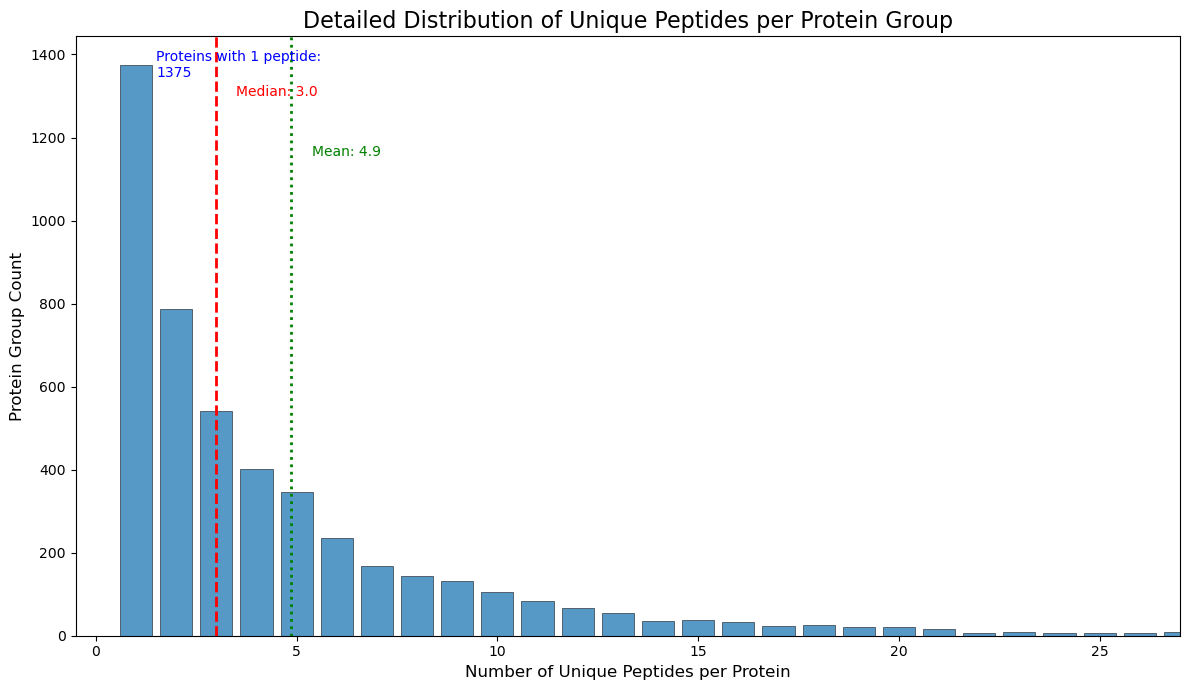


--- 3. Digestion Efficiency (Missed Cleavages Analysis) ---
Info: Missed Cleavages analysis was skipped because the column 'Missed.Cleavages' was not found in your report file.

✅ Data quality assessment complete!


--- Final Quality Summary Report ---


total_unique_proteins             4744
total_unique_peptides            23112
peptides_per_protein_median        3.0
percentage_0_missed_cleavages      N/A
dtype: object

In [12]:
# ==============================================================================
#                 全新分析：第三步 - 执行绝对质量评估 (最终修正版)
#        (本版本将“肽段支持数”的图表变得更加详细和清晰)
# ==============================================================================

# 导入我们将要使用的所有Python库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# ------------------------------------------------------------------------------
# (A) 函数定义区: 这里是我们的“工具箱”
# ------------------------------------------------------------------------------
def perform_absolute_qc_final(df):
    """
    对已经筛选好的DIANN报告数据执行全面的绝对质量评估 (最终修正版)。
    """
    display(HTML(f"<h3>Step 3: Performing Absolute Quality Assessment</h3>"))

    # --- 1. 总体鉴定效率 ---
    print("\n--- 1. Overall Identification Efficiency ---")
    total_proteins = df['Protein.Group'].nunique()
    total_peptides = df['Stripped.Sequence'].nunique()
    print(f"Total Unique Protein Groups Identified: {total_proteins}")
    print(f"Total Unique Peptides Identified: {total_peptides}")

    # --- 2. 每个蛋白质组的肽段支持数 ---
    print("\n--- 2. Peptides per Protein Group (Identification Confidence) ---")
    peptides_per_protein = df.groupby('Protein.Group')['Stripped.Sequence'].nunique()
    peptides_per_protein_summary = peptides_per_protein.describe()
    print("Summary Statistics:")
    display(peptides_per_protein_summary)
    
    # 【核心修正】在这里，我们让图表变得更详细
    plt.figure(figsize=(12, 7)) # 把画布调得稍大一些
    # 使用 `discrete=True` 参数，这会让seaborn为每个整数创建一个独立的柱子
    ax = sns.histplot(peptides_per_protein, discrete=True, shrink=0.8)
    
    plt.title('Detailed Distribution of Unique Peptides per Protein Group', fontsize=16)
    plt.xlabel('Number of Unique Peptides per Protein', fontsize=12)
    plt.ylabel('Protein Group Count', fontsize=12)
    # 我们可以把X轴的范围取得更广一些，比如到前99%分位数的位置，看得更全
    plt.xlim(-0.5, peptides_per_protein.quantile(0.99)) 
    
    # 添加更多的注释信息
    median_val = peptides_per_protein_summary['50%']
    mean_val = peptides_per_protein_summary['mean']
    
    # 标记中位数
    plt.axvline(median_val, color='red', linestyle='--', linewidth=2)
    plt.text(median_val + 0.5, plt.ylim()[1] * 0.9, f"Median: {median_val:.1f}", color='red')
    
    # 标记平均值
    plt.axvline(mean_val, color='green', linestyle=':', linewidth=2)
    plt.text(mean_val + 0.5, plt.ylim()[1] * 0.8, f"Mean: {mean_val:.1f}", color='green')
    
    # 计算并标注只有1条肽段支持的蛋白质数量
    one_peptide_proteins = peptides_per_protein[peptides_per_protein == 1].count()
    plt.text(1.5, one_peptide_proteins, f'Proteins with 1 peptide:\n{one_peptide_proteins}', ha='left', va='center', color='blue')

    plt.tight_layout()
    plt.show()

    # --- 3. 酶切效率 (漏切位点分析) ---
    print("\n--- 3. Digestion Efficiency (Missed Cleavages Analysis) ---")
    if 'Missed.Cleavages' in df.columns:
        unique_peptides_df = df.drop_duplicates(subset=['Stripped.Sequence'])
        missed_cleavage_dist = unique_peptides_df['Missed.Cleavages'].value_counts(normalize=True).sort_index() * 100
        missed_cleavage_dist.name = 'Percentage (%)'
        print("Distribution of Missed Cleavages for Unique Peptides:")
        display(missed_cleavage_dist.reset_index())
        plt.figure(figsize=(8, 5))
        sns.barplot(x=missed_cleavage_dist.index, y=missed_cleavage_dist.values, hue=missed_cleavage_dist.index, palette='viridis', legend=False)
        plt.title('Missed Cleavages Distribution', fontsize=16)
        plt.xlabel('Number of Missed Cleavages', fontsize=12)
        plt.ylabel('Percentage of Unique Peptides (%)', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Info: Missed Cleavages analysis was skipped because the column 'Missed.Cleavages' was not found in your report file.")

    # --- 4. 生成摘要报告 ---
    quality_summary = {
        'total_unique_proteins': total_proteins,
        'total_unique_peptides': total_peptides,
        'peptides_per_protein_median': median_val,
        'percentage_0_missed_cleavages': missed_cleavage_dist.get(0, 0) if 'Missed.Cleavages' in df.columns else 'N/A'
    }
    print("\n✅ Data quality assessment complete!")
    return quality_summary


# ------------------------------------------------------------------------------
# (B) 主逻辑执行区: 这里是我们的“点火开关”
# ------------------------------------------------------------------------------
try:
    # 调用我们上面定义好的【最终修正版】核心分析函数
    final_summary_report = perform_absolute_qc_final(analysis_df)
    
    # 将函数返回的摘要报告打印出来
    print("\n\n--- Final Quality Summary Report ---")
    summary_series = pd.Series(final_summary_report)
    display(summary_series)
    
except NameError:
    print("❌ 错误: 变量 'analysis_df' 未定义。请确保您已经成功运行了第二步“定义范围与数据筛选”的代码框。")
except Exception as e:
    print(f"❌ 发生了一个意想不到的错误: {e}")